# IMPORT

In [1]:
# Provides functions to create deep or shallow copies of objects
import copy
# Provides access to basic mathematical functions  
import math
# Impoer NumPy for numerical operations and working with arrays
import numpy as np
# Imports matplotlib fot creating plots and visualizations
import matplotlib.pyplot as plt

# DATASET

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# PREDICTION
The prediction is given by $f_{\vec{w}, b}(\vec{x}) = \vec{w}^T \vec{x} + b$, which is equivalent to $f_{\vec{w}, b}(\vec{x}) = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b$.

In [3]:
def predict(w, b, x):
    """
    Make a single prediction using linear regression.
    Args: 
        w (ndarray(n, )): model parameters (weights)
        b (scalar): bias term
        x (ndarray): shape (n, ) - input features for a single prediction 
    Returns:
        prediction (scalar): model output 
    """
    prediction = np.dot(w, x) + b
    return prediction

# COST
The cost function used in linear regression is: $ J(\vec{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)} \right)^2 $

In [4]:
def compute_cost(w, b, X, y):
    """
    Compute cost.
    Args: 
        w (ndarray(n, )): model parameters (weights)
        b (scalar): bias term
        X (ndarray(m, n)): training input examples
        y (ndarray(m, )): target values 
    Returns:
        final_cost (scalar): the cost
    """
    # Get number of training examples (m) and number of features (n)
    m, n = X.shape
    # Initialize total cost accumulator 
    cost_accumulator = 0.0
    for i in range(m):
        # Compute prediction for i
        current_prediction = predict(w, b, X[i])
        # Accumulate squared error 
        cost_accumulator += (current_prediction - y[i]) ** 2
    # Compute average cost
    final_cost = cost_accumulator / (2 * m)
    # Return the computed cost
    return final_cost

# GRADIENT
The gradients are $\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$ and $\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_{\vec{w}, b}(\vec{x}^{(i)}) - y^{(i)})$.

In [5]:
def compute_gradients(w, b, X, y):
    """
    Compute the gradient of each parameter of the models.
    Args:
        w (ndarray(n, )): weights 
        b (float): bias 
        X (ndarray(m, n)): input features
        y (ndarray(m)): target values 
    Returns:
        grad_w (ndarray(n, )): gradients with respect to weights 
        grad_b (float): gradient with respect to bias
    """
    # 
    grad_w = []
    # Retrive the number of examples
    m = X.shape[0]
    # Retrieve the number of features
    n = X.shape[1]
    # Compute gradient for each weight
    for j in range(n):
        sum_errors = 0.0
        for i in range(m):
            prediction = predict(w, b, X[i])
            target = y[i]
            x_ij = X[i][j]
            sum_errors += (prediction - target) * x_ij
        grad_w.append(sum_errors / m)
    # Compute gradient for bias
    sum_errors = 0.0
    for i in range(m):
        prediction = predict(w, b, X[i])
        target = y[i]
        sum_errors += prediction - target
    grad_b = sum_errors / m
    return np.array(grad_w), grad_b

# GRADIENT DESCENT

To minimize the cost function in linear regression, we apply gradient descent, an iterative optimization algorithm.
- For each weight: $ w_j := w_j - \alpha \cdot \frac{\partial J(\vec{w}, b)}{\partial w_j} $
- For the bias: $ b := b - \alpha \cdot \frac{\partial J(\vec{w}, b)}{\partial b} $

In [6]:
def gradient_descent(w, b, X, y, alpha):
    """
    Perform one step of gradient descent on the parameters w and b.
    Args:
        w (ndarray(n, )): current weights
        b (float): current bias 
        X (ndarray(m, n)): training input features
        y (ndarray(n, )): target values 
        alpha (float): learning rate 
    Returns: 
        w (ndarray(n, )): updated weights after one gradient descent step
        b (float): updated bias after one gradient descent step
    """
    # Compute gradients of the cost function with respect to w and b
    grad_w, grad_b = compute_gradients(w, b, X, y)
    # Update weights using gradient descent rule 
    for j in range(len(w)):
        w[j] = w[j] - alpha * grad_w[j]
    # Update bias 
    b = b - alpha * grad_b
    return w, b 

# TRAIN

In [7]:
def train(w, b, X, y, alpha, epochs):
    """
    Perform one step of gradient descent on the parameters w and b.
    Args:
        w (ndarray(n, )): current weights
        b (float): current bias 
        X (ndarray(m, n)): training input features
        y (ndarray(n, )): target values 
        alpha (float): learning rate 
        epochs (int): number of full passes over the training dataset
    Returns: 
        w (ndarray(n, )): updated weights after one gradient descent step
        b (float): updated bias after one gradient descent step
    """
    cost_history = []
    iteration_history = []
    for i in range(epochs):
        # Compute and store current cost
        cost = compute_cost(w, b, X, y)
        cost_history.append(cost)
        iteration_history.append(i + 1)
        # Perform one step of gradient descent and update parameters
        w, b = gradient_descent(w, b, X, y, alpha)
    return w, b, cost_history, iteration_history

# PLOT

In [8]:
def plot_cost(cost_history, iteration_history):
    """
    Plot full and zoomed cost over training iterations.
    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Full view
    axs[0].plot(iteration_history, cost_history, linewidth=2)
    axs[0].set_title("Cost vs. iteration")
    axs[0].set_xlabel("iteration step")
    axs[0].set_ylabel("Cost")

    # Zoomed (tail)
    axs[1].plot(iteration_history[-500:], cost_history[-500:], linewidth=2)
    axs[1].set_title("Cost vs. iteration (tail)")
    axs[1].set_xlabel("iteration step")
    axs[1].set_ylabel("Cost")

    plt.tight_layout()
    plt.show()

# TEST

b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


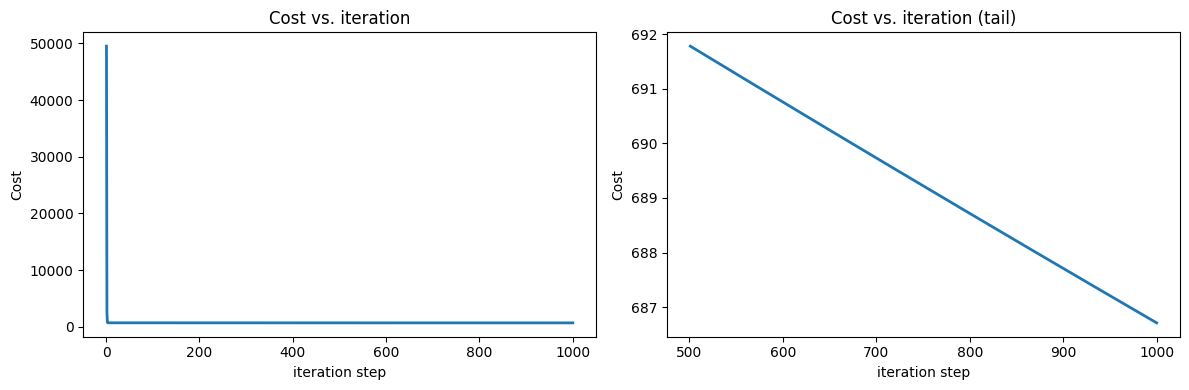

In [10]:
# Initialize parameters
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.0

# Some gradient descent settings
epochs = 1000
alpha = 5.0e-7

# Run gradient descent 
updated_w, updated_b, cost_history, iteration_history = train(initial_w, initial_b, X_train, y_train, alpha, epochs)
print(f"b,w found by gradient descent: {updated_b:0.2f},{updated_w} ")

# Print predictions
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], updated_w) + updated_b:0.2f}, target value: {y_train[i]}")

# Plot
plot_cost(cost_history, iteration_history)